In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import Series,DataFrame
import scipy.optimize

In [3]:
def logistic(p,t):
    A,mu,lamb = p
    y = A/(1+np.exp((4*mu/A)*(lamb-t)+2))
    return y

In [4]:
def residuals(p,t,y):
    return y-logistic(p,t)

In [5]:
data = pd.ExcelFile('ART_coverage2.xlsx')
dframe = data.parse('Data')
dframe2 = dframe.pivot_table(index='Country Name',columns='Year',values='Value')
dframe2 = dframe2.dropna(axis=0,how='all')
dframe2 = dframe2.dropna(axis=1,how='all')
diff = dframe2.diff(axis=1)
diff.fillna(0,inplace=True)

In [8]:
t = np.arange(0,15)
y = np.asarray(dframe2.ix['Argentina'])

In [9]:
a = 100
mu = diff.ix['Argentina'].max()
lamb = 0
p_guess = (a,mu,lamb)

In [10]:
plsq = scipy.optimize.leastsq(residuals,p_guess,args=(t,y))

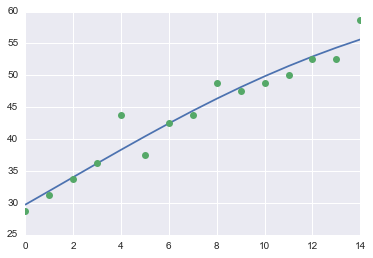

In [11]:
%matplotlib inline
plt.plot(t,logistic(plsq[0],t),t,y,'o')

In [12]:
plsq

(array([ 67.21587948,   2.16076159, -13.75684139]), 1)